## Creating train/test split with non-overlapping EEG windows (on data filtered for NaN) 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/filtered_train.csv')
vote_cols = df.columns[-6:]

In [3]:
vote_cols

Index(['seizure_vote', 'lpd_vote', 'gpd_vote', 'lrda_vote', 'grda_vote',
       'other_vote'],
      dtype='object')

In [4]:
df.columns

Index(['Unnamed: 0', 'eeg_id', 'eeg_sub_id', 'eeg_label_offset_seconds',
       'spectrogram_id', 'spectrogram_sub_id',
       'spectrogram_label_offset_seconds', 'label_id', 'patient_id',
       'expert_consensus', 'seizure_vote', 'lpd_vote', 'gpd_vote', 'lrda_vote',
       'grda_vote', 'other_vote'],
      dtype='object')

In [5]:
df.drop(columns=['Unnamed: 0'], inplace=True)

## Let's try this with StratifiedGroupKFold

In [6]:
from sklearn.model_selection import StratifiedGroupKFold

## Let's try all of this will all the data (including overlaps)!

In [7]:
df['offset_bins'] = pd.cut(df['eeg_label_offset_seconds'], bins=[i*10 - 1 for i in range(339)])

In [8]:
df['offset_bins'] = df['offset_bins'].astype('str')

In [9]:
df['offset_bins'] = df['offset_bins'].apply(lambda x : (int(x.split(',')[1][1:-1]) + 1) // 10 - 1 )

In [11]:
df.head(5)

,eeg_id,eeg_sub_id,eeg_label_offset_seconds,spectrogram_id,spectrogram_sub_id,spectrogram_label_offset_seconds,label_id,patient_id,expert_consensus,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote,offset_bins
0,1628180742,0,0.0,353733,0,0.0,127492639,42516,Seizure,3,0,0,0,0,0,0
1,1628180742,1,6.0,353733,1,6.0,3887563113,42516,Seizure,3,0,0,0,0,0,0
2,1628180742,2,8.0,353733,2,8.0,1142670488,42516,Seizure,3,0,0,0,0,0,0
3,1628180742,3,18.0,353733,3,18.0,2718991173,42516,Seizure,3,0,0,0,0,0,1
4,1628180742,4,24.0,353733,4,24.0,3080632009,42516,Seizure,3,0,0,0,0,0,2


In [12]:
df.shape[0]

106073

In [13]:
df = df.loc[df['offset_bins'] % 2 == 0]

In [14]:
df.shape[0]

65313

In [15]:
df.head()

,eeg_id,eeg_sub_id,eeg_label_offset_seconds,spectrogram_id,spectrogram_sub_id,spectrogram_label_offset_seconds,label_id,patient_id,expert_consensus,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote,offset_bins
0,1628180742,0,0.0,353733,0,0.0,127492639,42516,Seizure,3,0,0,0,0,0,0
1,1628180742,1,6.0,353733,1,6.0,3887563113,42516,Seizure,3,0,0,0,0,0,0
2,1628180742,2,8.0,353733,2,8.0,1142670488,42516,Seizure,3,0,0,0,0,0,0
4,1628180742,4,24.0,353733,4,24.0,3080632009,42516,Seizure,3,0,0,0,0,0,2
5,1628180742,5,26.0,353733,5,26.0,2413091605,42516,Seizure,3,0,0,0,0,0,2


In [16]:
df = df.groupby(['eeg_id', 'offset_bins']).agg('first').reset_index()

In [17]:
df.head()

,eeg_id,offset_bins,eeg_sub_id,eeg_label_offset_seconds,spectrogram_id,spectrogram_sub_id,spectrogram_label_offset_seconds,label_id,patient_id,expert_consensus,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote
0,568657,0,0,0.0,789577333,0,0.0,1825637311,20654,Other,0,0,3,0,2,7
1,582999,0,0,0.0,1552638400,0,0.0,1722186807,20230,LPD,0,12,0,1,0,1
2,582999,2,6,20.0,1552638400,6,20.0,2663298457,20230,LPD,0,12,0,1,0,1
3,642382,0,0,0.0,14960202,12,1008.0,3254468733,5955,Other,0,0,0,0,0,1
4,642382,2,1,24.0,14960202,13,1032.0,2552357208,5955,Other,0,0,0,0,0,1


In [18]:
vote_cols = df.columns[-6:]

In [19]:
df['total_votes'] = df[vote_cols].sum(axis=1)

In [20]:
df.head()

,eeg_id,offset_bins,eeg_sub_id,eeg_label_offset_seconds,spectrogram_id,spectrogram_sub_id,spectrogram_label_offset_seconds,label_id,patient_id,expert_consensus,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote,total_votes
0,568657,0,0,0.0,789577333,0,0.0,1825637311,20654,Other,0,0,3,0,2,7,12
1,582999,0,0,0.0,1552638400,0,0.0,1722186807,20230,LPD,0,12,0,1,0,1,14
2,582999,2,6,20.0,1552638400,6,20.0,2663298457,20230,LPD,0,12,0,1,0,1,14
3,642382,0,0,0.0,14960202,12,1008.0,3254468733,5955,Other,0,0,0,0,0,1,1
4,642382,2,1,24.0,14960202,13,1032.0,2552357208,5955,Other,0,0,0,0,0,1,1


In [21]:
for c in vote_cols:
    df[c] = df[c] / df['total_votes']

In [22]:
df.head(5)

,eeg_id,offset_bins,eeg_sub_id,eeg_label_offset_seconds,spectrogram_id,spectrogram_sub_id,spectrogram_label_offset_seconds,label_id,patient_id,expert_consensus,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote,total_votes
0,568657,0,0,0.0,789577333,0,0.0,1825637311,20654,Other,0.0,0.000000,0.25,0.000000,0.166667,0.583333,12
1,582999,0,0,0.0,1552638400,0,0.0,1722186807,20230,LPD,0.0,0.857143,0.00,0.071429,0.000000,0.071429,14
2,582999,2,6,20.0,1552638400,6,20.0,2663298457,20230,LPD,0.0,0.857143,0.00,0.071429,0.000000,0.071429,14
3,642382,0,0,0.0,14960202,12,1008.0,3254468733,5955,Other,0.0,0.000000,0.00,0.000000,0.000000,1.000000,1
4,642382,2,1,24.0,14960202,13,1032.0,2552357208,5955,Other,0.0,0.000000,0.00,0.000000,0.000000,1.000000,1


In [24]:
sgkf = StratifiedGroupKFold(n_splits=10)
for (t,v) in sgkf.split(X = df, y=df['expert_consensus'], groups=df['patient_id']):
    train_idx_full = t
    test_idx_full = v
    break

In [25]:
df_train = df.loc[train_idx_full]
df_test = df.loc[test_idx_full]

In [26]:
print(df_train.shape, df_test.shape, df.shape)

(30215, 17) (3355, 17) (33570, 17)


In [27]:
df_train.shape[0] / df.shape[0] * 100

90.00595770032767

In [28]:
print(df['expert_consensus'].value_counts(normalize=True), '\n')
print(df_train['expert_consensus'].value_counts(normalize=True), '\n')
print(df_test['expert_consensus'].value_counts(normalize=True))

expert_consensus
Other      0.283438
Seizure    0.219333
LPD        0.150700
GRDA       0.144832
GPD        0.123622
LRDA       0.078076
Name: proportion, dtype: float64 

expert_consensus
Other      0.283402
Seizure    0.219328
LPD        0.150687
GRDA       0.144796
GPD        0.123713
LRDA       0.078074
Name: proportion, dtype: float64 

expert_consensus
Other      0.283756
Seizure    0.219374
LPD        0.150820
GRDA       0.145156
GPD        0.122802
LRDA       0.078092
Name: proportion, dtype: float64


In [29]:
tmp1 = pd.DataFrame(df['expert_consensus'].value_counts(normalize=True))
tmp1.reset_index(inplace=True)

tmp2 = pd.DataFrame(df_train['expert_consensus'].value_counts(normalize=True))
tmp2.reset_index(inplace=True)

tmp3 = pd.DataFrame(df_test['expert_consensus'].value_counts(normalize=True))
tmp3.reset_index(inplace=True)

tmp1 = tmp1.sort_values(by='expert_consensus')
tmp2 = tmp2.sort_values(by='expert_consensus')
tmp3 = tmp3.sort_values(by='expert_consensus')

X = list(tmp1['expert_consensus'].values)

Y1 = tmp1['proportion']
Y2 = tmp2['proportion']
Y3 = tmp3['proportion']


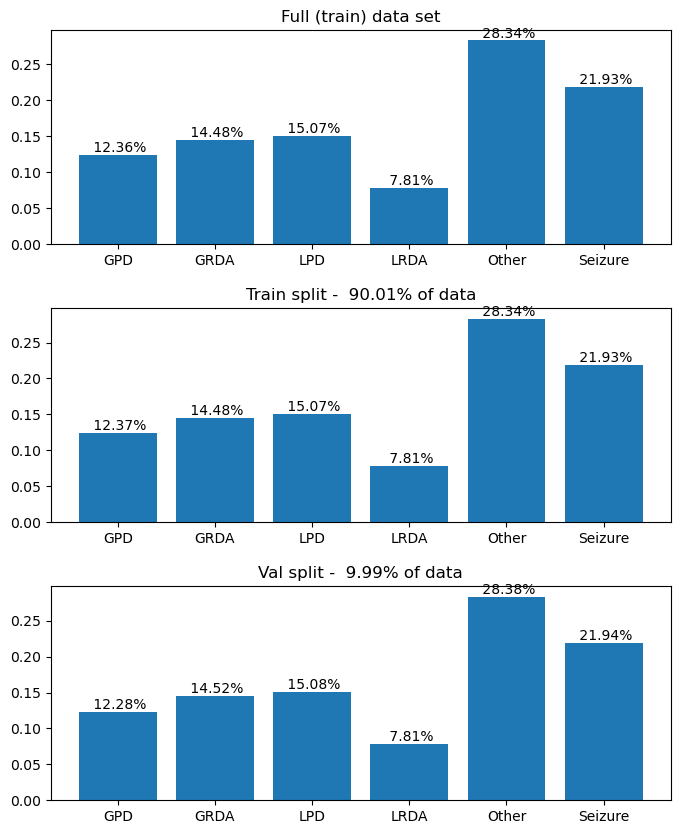

In [30]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3, figsize=(8,10))
fig.subplots_adjust(hspace=0.3)

axs[0].bar(X, Y1)
axs[0].set_title('Full (train) data set')

axs[1].bar(X, Y2)
axs[1].set_title(f'Train split - {(df_train.shape[0] / df.shape[0]) * 100 : .2f}% of data')

axs[2].bar(X, Y3)
axs[2].set_title(f'Val split - {(df_test.shape[0] / df.shape[0]) * 100 : .2f}% of data')

for i, p in enumerate(Y1):
    axs[0].text(i, p, f'{p*100 : .2f}%', ha='center', va='bottom')

for i, p in enumerate(Y2):
    axs[1].text(i, p, f'{p*100 : .2f}%', ha='center', va='bottom')

for i, p in enumerate(Y3):
    axs[2].text(i, p, f'{p*100 : .2f}%', ha='center', va='bottom')

plt.show()

### I think we should stick to using all the data for now - then later we can fiddle with this further

In [31]:
df.to_csv('non_overlapping_data_no_NAN.csv')
df_train.to_csv('non_overlapping_train_no_NAN.csv')
df_test.to_csv('non_overlapping_test_no_NAN.csv')

## Distribution of total_votes by consensus categories 

In [33]:
df.groupby('expert_consensus')['total_votes'].agg(['min', 'max', 'median', pd.Series.mode])

,min,max,median,mode
expert_consensus,,,,
GPD,1,19,11.0,15
GRDA,1,19,3.0,3
LPD,1,19,5.0,3
LRDA,1,19,3.0,3
Other,1,28,4.0,3
Seizure,1,20,3.0,3


In [34]:
vote_types = list(df['expert_consensus'].unique())

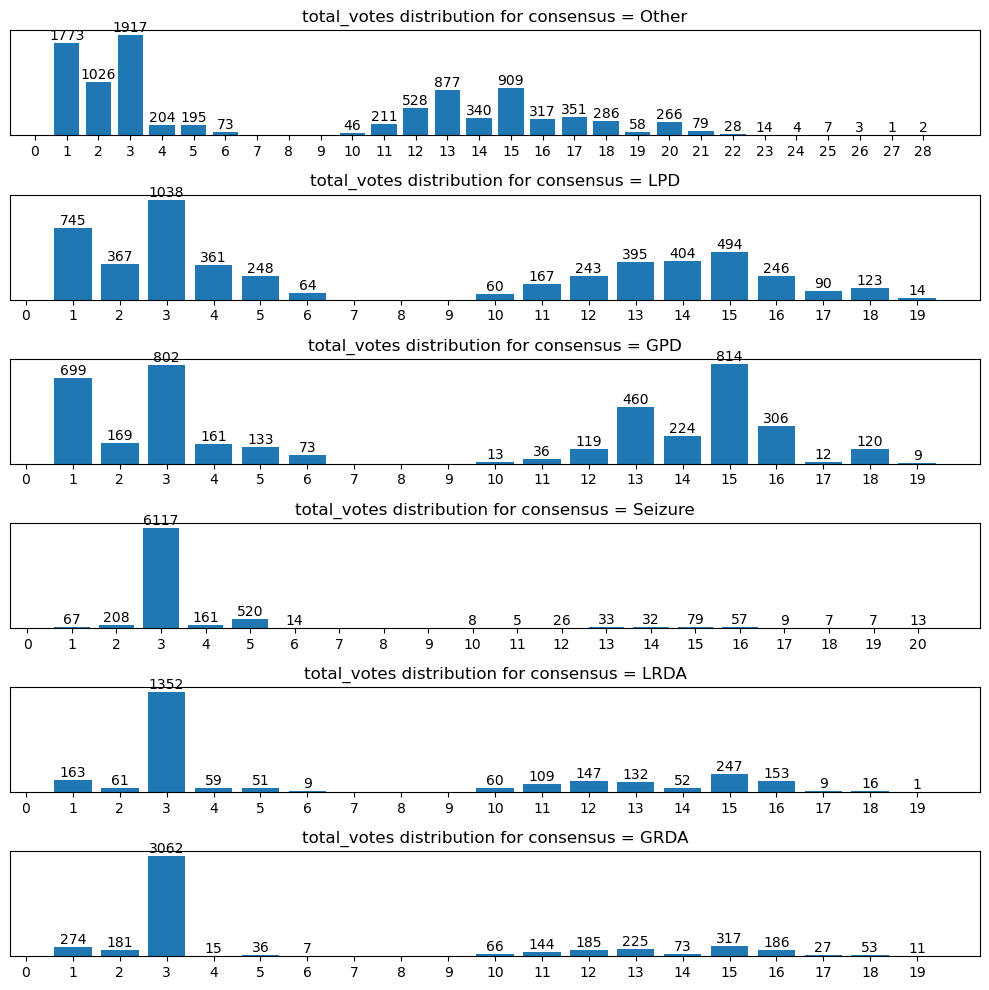

In [35]:
fig, axs = plt.subplots(6, figsize=(10,10))

for i in range(6):
    consensus_type = vote_types[i]
    tmp = df[df['expert_consensus'] == consensus_type].groupby('total_votes').size().reset_index().rename(columns={0:'num_of_these_votes'})
    X = list(tmp['total_votes'])
    y = list(tmp['num_of_these_votes'])
    axs[i].bar(X,y)
    axs[i].set_xticks(range(max(X) + 1))

    for j,x in enumerate(X):
        axs[i].text(x, y[j], f'{y[j]}', ha='center', va='bottom', size=10)

    axs[i].set_title('total_votes distribution for consensus = ' + consensus_type)
    axs[i].yaxis.set_visible(False)
    
plt.tight_layout()
plt.show()